In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sat_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/satData.csv')
prof_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/profileData.csv')

In [4]:
print("The sat_df has columns: ", sat_df.columns.to_list(), '\n')
print("The prof_df has columns: ", prof_df.columns.to_list())

The sat_df has columns:  ['float', 'cycleNumber', 'date', 'latitude', 'longitude', 'elevation', 'MO_SAT_SST', 'MO_SAT_CHL', 'MO_SAT_BBP', 'LT_SAT_SST_SD', 'LT_SAT_SST_MED', 'LT_SAT_CHL_SD', 'LT_SAT_CHL_MED', 'LT_SAT_BBP_SD', 'LT_SAT_BBP_MED'] 

The prof_df has columns:  ['float', 'cycleNumber', 'date', 'PRES', 'PSAL', 'TEMP', 'BBP700', 'CHLA']


In [14]:
print(prof_df['PRES'].min())
print(prof_df['PRES'].max())

float                      1902303
cycleNumber                      1
PROF_date      2010-06-01 16:28:06
PRES                             0
PSAL                     16.288767
TEMP                     -1.860345
BBP700                   -0.000776
CHLA                      -0.15695
dtype: object


float                      7901001
cycleNumber                    454
PROF_date      2022-05-23 11:34:00
PRES                          1119
PSAL                     40.727628
TEMP                     32.041167
BBP700                     0.08411
CHLA                     21.363333
dtype: object

In [5]:
sat_df = sat_df.rename(columns={'date': 'SAT_date'})
prof_df = prof_df.rename(columns={'date': 'PROF_date'})

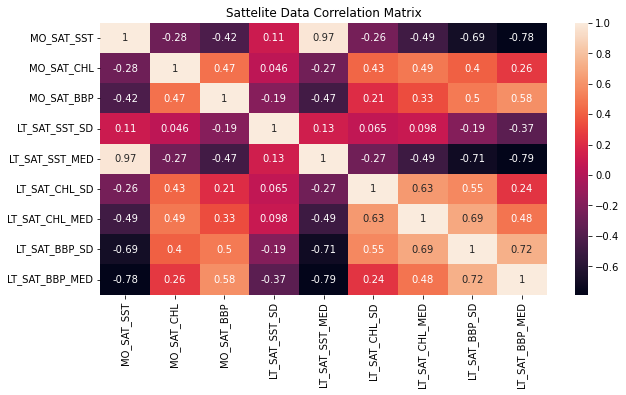

In [6]:
sat_df_vars = sat_df[[
    "MO_SAT_SST",
    "MO_SAT_CHL",
    "MO_SAT_BBP",
    "LT_SAT_SST_SD",
    "LT_SAT_SST_MED",
    "LT_SAT_CHL_SD",
    "LT_SAT_CHL_MED",
    "LT_SAT_BBP_SD",
    "LT_SAT_BBP_MED"
]]
fig, ax  = plt.subplots(1,1, figsize=(10,5))
satCorrMatrix = sat_df_vars.corr()
ax.set_title("Sattelite Data Correlation Matrix")
sns.heatmap(satCorrMatrix, annot=True)
plt.show()


Lets merge the two dfs based on float number and cycle and then see the connection between the variables


In [7]:
merged_df = sat_df.merge(prof_df, on=["float", "cycleNumber"], how='inner')

In [8]:
merged_df.head()

,float,cycleNumber,SAT_date,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,...,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED,PROF_date,PRES,PSAL,TEMP,BBP700,CHLA
0,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,3,35.539001,12.378333,0.001788,0.695875
1,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,4,35.539001,12.378333,0.001788,0.695875
2,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,6,35.539001,12.378667,0.001788,0.696499
3,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,8,35.539001,12.379000,0.001789,0.716489
4,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,10,35.539001,12.379000,0.001790,0.715552


In [9]:
print("The merged_df has columns", merged_df.columns.to_list())

The merged_df has columns ['float', 'cycleNumber', 'SAT_date', 'latitude', 'longitude', 'elevation', 'MO_SAT_SST', 'MO_SAT_CHL', 'MO_SAT_BBP', 'LT_SAT_SST_SD', 'LT_SAT_SST_MED', 'LT_SAT_CHL_SD', 'LT_SAT_CHL_MED', 'LT_SAT_BBP_SD', 'LT_SAT_BBP_MED', 'PROF_date', 'PRES', 'PSAL', 'TEMP', 'BBP700', 'CHLA']


Lets see the correlations between the CHLA measurement from the float (specific moment in time) as well as the monthly and LT average measurements of CHLA from sattelate

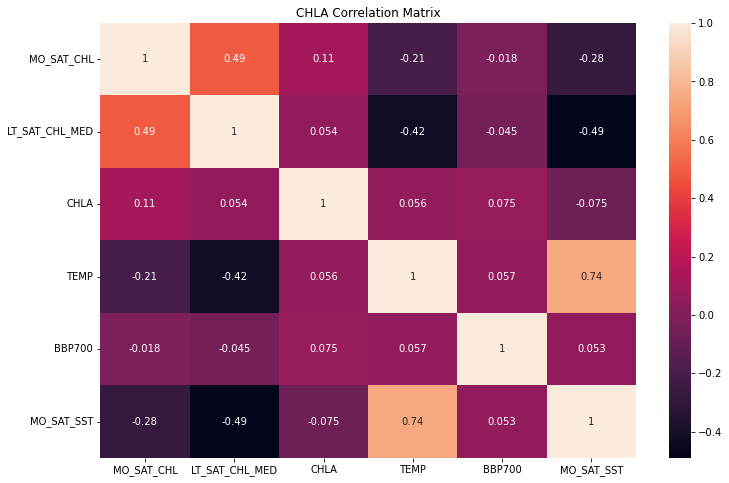

In [11]:
chla_Matrix = merged_df[[
    "MO_SAT_CHL",
    "LT_SAT_CHL_MED",
    "CHLA",
    "TEMP",
    "BBP700",
    "MO_SAT_SST",
]]

fig, ax  = plt.subplots(1,1, figsize=(12,8))
chlaCorrMatrix = chla_Matrix.corr()
ax.set_title("Correlation Matrix (merged DF)")
sns.heatmap(chlaCorrMatrix, annot=True)
plt.show()